<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos - PEC4
============================

En este Notebook encontraréis un ejercicio que supone la cuarta actividad de evaluación continuada (PEC) de la asignatura. Esta PEC consta de un único ejercicio a resolver, que engloba muchos de los conceptos cubiertos durante la asignatura.

El objetivo de este ejercicio es desarrollar un **paquete de Python**, fuera del entorno de Notebooks, que nos permita resolver el problema dado. Este tendrá que incluir el correspondiente código organizado lógicamente (separado en módulos, organizados por funcionalidad), la documentación del código (docstrings) y tests. Además, se deben incluir los correspondientes archivos de documentación de alto nivel (README), así como los archivos de licencia y dependencias (`requirements.txt`). 

Se nos pide que implementemos un paquete (módulo) de Python que sea capaz de realizar un anàlisis de datos con información sobre diferentes entrevistas en los Estados Unidos durante el último año en relación con el coronavirus y cómo el expresidente Trump ha gestionado la situación. Por un lado tendremos los datos sobre las entrevistas (quién las ha hecho, cuándo, cuál era la pregunta, a qué grupo de población estaba dirigida, ...) y además tendremos información sobre la credibilidad de estas entrevistans en función de quién las ha realizado.

# Los datos

Los datos a analizar nos son proporcionados en dos colecciones de datos separadas: `covid_approval_polls.csv` y `covid_concern_polls.csv`. Por otro lado tenemos `pollster_ratings.xlsx` con la información sobre la credibilidad de las entrevistas por entrevistador (*pollster*). Estos datos provienen del [repositorio Five Thirty Eight](https://github.com/fivethirtyeight/covid-19-polls). Os aconsejamos usar los archivos que os hemos proporcionado nosotros ya que los datos tienen alguna modificación respecto los datos originales. 

`covid_approval_polls.csv` contiene entrevistas sobre la aprobación o no de la actuación de Donald Trump durante el inicio de la pandemia. Mientras que `covid_concern_polls.csv` contiene entrevistas sobre la concienciación de la población sobre el impacte económico o bien el impacto en su salud o la de su familia del coronavirus. Y como hemos mencionado anteriormente `pollster_ratings.xlsx` contiene información sobre la credibilidad del agente entrevistador.

Echando un vistazo a los archivos proporcionados, podréis ver que los diferentes archivos contienen bastante información. Para resolver el ejercicio propuesto, seguramente no usaréis toda la información que contienen estos archivos.


## covid_approval_polls.csv
El archivo `covid_approval_polls.csv` contien 2227 líneas con información sobre 2226 entrevistas:

```
start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
2020-02-02,2020-02-04,YouGov,Economist,1500,a,all,Trump,FALSE,Do you approve or disapprove of Donald Trump’s handling of the coronavirus outbreak?,42,29,https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/73jqd6u5mv/econTabReport.pdf
2020-02-02,2020-02-04,YouGov,Economist,376,a,R,Trump,FALSE,Do you approve or disapprove of Donald Trump’s handling of the coronavirus outbreak?,75,6,https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/73jqd6u5mv/econTabReport.pdf
...
```

La primera línea contiene la cabecera y el nombre de las columnas para cada entrada (línea) del documento.

Comentar que las columnas `approve` y `disapprove` están en tanto por ciento respecto la respuesta sobre la población (`sample_size`) de cada entrevista.


## covid_concern_polls.csv
El archivo `covid_concern_polls.csv` contien 639 líneas con información sobre 638 entrevistas:

```
start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
2020-01-27,2020-01-29,Morning Consult,"",2202,a,all,concern-economy,FALSE,How concerned are you that the coronavirus will impact the following? U.S. economy,19,33,23,11,https://morningconsult.com/wp-content/uploads/2020/02/200167_crosstabs_CORONAVIRUS_Adults_v2_JB-1.pdf
2020-01-31,2020-02-02,Morning Consult,"",2202,a,all,concern-economy,FALSE,How concerned are you that the coronavirus will impact the following? U.S. economy,26,32,25,7,https://morningconsult.com/wp-content/uploads/2020/02/200191_crosstabs_CORONAVIRUS_Adults_v2_JB-1.pdf
...
```

La primera línea contiene la cabecera y el nombre de las columnas para cada entrada (línea) del documento.

Comentar que las columnas `very`, `somewhat`, `not_very` y `not_at_all` están en tanto por ciento respecto la respuesta en la población (`sample_size`) de cada entrevista.

Notar que los porcentajes a veces suman algo más de 100 (o menos). Esto es debido a errores de redondeo de los datos, pero a vosotros no os afecta este hecho en el análisis que tenéis que hacer en esta práctica.


## pollster_ratings.xlsx.
El archivo `pollster_ratings.xlsx` contiene 454 líneas con información sobre 453 agentes entrevistadores:

```
Pollster,Pollster Rating ID,# of Polls,NCPP / AAPOR / Roper,Live Caller With Cellphones,Methodology,Banned by 538,Predictive    Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,Misses Outside MOE,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty,latest_poll
Monmouth University,215,108,yes,yes,Live,no,-1.6,A+,D +1.3,81%,21%,5.4,6.7,-1.2,-2,-1.6,71,D +1.8,R +0.4,5.2,0.2,3/13/20
Selzer & Co.,304,48,yes,yes,Live,no,-1.3,A+,D +0.1,79%,25%,4.6,6.1,-1.3,-1.8,-1.1,31,D +0.2,D +0.2,5.2,0,11/1/18
ABC News/The Washington Post,3,73,yes,yes,Live,no,-1.3,A+,D +0.5,72%,7%,2.8,4.8,-1.7,-1.7,-1.2,68,D +0.8,D +1.3,3.8,0.12,10/31/18
...
```

La primera línea contiene la cabecera y el nombre de las columnas para cada entrada (línea) del documento.

/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9


In [7]:
# pandas problem: https://stackoverflow.com/questions/40553560/jupyter-python3-notebook-cannot-recognize-pandas
#!pip install pandas
#import pandas as pd
import sys
print(sys.executable) 
#! /usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9 -m pip install pandas
! /usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9 -m pip install --upgrade pip

/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9
  Using cached pip-21.1.2-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1


In [88]:
import pandas as pd
df_approvals = pd.read_csv('/Users/elenacanton/Documents/UOC/UOC/Programacion/2do/pec4/covid_approval_polls.csv')
df_approvals.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,False,Do you approve or disapprove of the job each o...,57.0,22.0,https://morningconsult.com/wp-content/uploads/...


In [10]:
df_concerns = pd.read_csv('/Users/elenacanton/Documents/UOC/UOC/Programacion/2do/pec4/covid_concern_polls.csv')
df_concerns.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.0,33.0,23.0,11.0,https://morningconsult.com/wp-content/uploads/...
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.0,32.0,25.0,7.0,https://morningconsult.com/wp-content/uploads/...
2,2020-02-02,2020-02-04,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,13.0,26.0,43.0,18.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-07,2020-02-09,Morning Consult,NaN,2200,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,23.0,32.0,24.0,9.0,https://morningconsult.com/wp-content/uploads/...
4,2020-02-07,2020-02-09,YouGov,Huffington Post,1000,a,all,concern-infected,False,How concerned are you that you or someone in y...,11.0,24.0,33.0,20.0,https://projects.fivethirtyeight.com/polls/202...


In [89]:
import re

#Apollo_regexp = r"\bApollo\b"
#Apollo = [n for n in data['detail'] if re.search(Apollo_regexp, n) is not None]
#Apollo

#Tengo que especificar str(n), porque en sponsor hay datos que no son strings

huffington_regex = r"\bHuffington Post\b"
huffington_approvals = len([n for n in df_approvals['sponsor'] if re.search(huffington_regex, str(n)) is not None])
print(huffington_approvals)


huffington_concerns  = len([n for n in df_concerns['sponsor'] if re.search(huffington_regex, str(n)) is not None])
print(huffington_concerns)

112
29


In [179]:
# huffington_regex = r"\bHuffington Post\b"
# huffington_approvals = len([n for n in df_approvals['sponsor'] if re.search(huffington_regex, str(n)) is not None])
# #print(huffington_approvals)


# for i in df_approvals.columns:
#     huffington_approvals = len([n for n in df_approvals[i] if re.search(huffington_regex, str(n)) is not None])
#     print(huffington_approvals)
    
from pandas.core.common import flatten
for i in df_approvals.columns:
    n = []
    result = len([n for n in df_approvals[i] if re.search('Huffington Post', str(n)) is not None])
    #print(result)
    if result > 0:
        n.append(result)
    else:
        pass
    print(n)
    #print(type(n))
    #print(list(flatten(n)))
#     elif result != 0:
#         result_list.append(result)
    #print(n)
    
    #for x in result_list:
        
    
#         total = 0
#         for ele in range(0, len(result_list)):
#             total = total + result_list[ele]
#         print("Sum of all elements in given list: ", total)
        
    

    

[]
[]
[]
[112]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [120]:
import numpy as np

def search_string(df, regex):
    for i in df_approvals.columns:
        L = []
        result = len([n for n in df[i] if re.search(regex, str(n)) is not None])
        if result > 0:
            L.append(result)
        #print(L)
    L2 =[]
    i = 0
    for elemt in L:
        L2.append([])
        L2[i].append(elem[0])
        i += 1
    print(L2)
        
    
search_string(df_approvals, 'Huffington Post')

[]


AttributeError: 'Series' object has no attribute 'Male'

In [87]:
import csv, re
path_csv = '/Users/elenacanton/Documents/UOC/UOC/Programacion/2do/pec4/covid_approval_polls.csv'

Huffington = []
with open (path_csv, 'r', encoding="utf-8") as csvfile:
    print(f"Reading '{path_csv}' csv")
    reader = csv.reader(csvfile, delimiter=';')
    huffington_regex = r"\bHuffington Post\b"
    for column in reader:
        result = len([n for n in column if re.search(regex, str(n)) is not None])
        print(result)


Reading '/Users/elenacanton/Documents/UOC/UOC/Programacion/2do/pec4/covid_approval_polls.csv' csv
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
import csv, re
path_csv = '/Users/elenacanton/Documents/UOC/UOC/Programacion/2do/pec4/covid_approval_polls.csv'

Huffington = []
with open (path_csv, 'r', encoding="utf-8") as csvfile:
    #print(f"Reading '{path_csv}' csv")
    reader = csv.reader(csvfile, delimiter=';')
    huffington_regex = r"\bHuffington Post\b"
    ctr = 0
    rows = 0
    for record in reader:
        if 'Huffington Post' in record[0]:
            rows +=1
            ctr += record[0].count('Huffington Post')
    print('Huffington Post: {}, rows: {}'.format(ctr, rows))


Huffington Post: 112, rows: 112


# Ejercicio

Será necesario que generéis funciones que os permitan hacer los siguientes cálculos:

1. Del archivo `covid_approval_polls.csv`:
<br>1.1 Implementad una función que cuente **de forma eficiente** y muestre por pantalla el número de veces que aparecen los patrones descritos (es decir, en cuántas líneas aparece) a continuación en el archivo, incluyendo un mensaje explicativo de los valores que mostráis por pantalla.
<br>Los patrones a considerar son:
   - El término *Huffington Post* 
   - Una url (sea http o https) con formato pdf. Por ejemplo: *https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/73jqd6u5mv/econTabReport.pdf*<br>
    <br>Un ejemplo de *output* sería:
    
    *The pattern Huffington_Post appears X times.*
    
    *The pattern url_pdf appears Y times.*<br>

  <br>1.2 ¿Si tuviéramos un archivo de 1Gb lo harías igual? Si no es así, implementar la solución para este caso.
  <br>1.3 ¿Si tuviéramos 100 archivos de 1Gb cómo lo harías? No hace falta implementar la solución, sólo una pequeña descripción de cómo resolverías el problema.

2. Leer los archivos facilitados de la forma más eficiente teniendo en cuenta las tareas pedidas a continuación y en el ejercicio 3, 4 y 5. Justificar vuestra decisión.
<br>Preparad los datos para cada .csv, obteniendo dos tablas que llamaremos `approval_polls`(proveniente de `covid_approval_polls.csv`) y `concern_polls` (proveniente de `covid_concern_polls.csv`) de forma que se cumplan todos los siguientes requisitos:
     - Sólo estaremos interesados en las entrevistas en las cuales su agente entrevistador (*pollster*) esté en la tabla `pollster_ratings.xlsx`
     - Sólo estaremos interesados en las entrevistas sin *tracking*.
     - Sólo estaremos interesados en las entrevistas en las cuales su agente entrevistador no ha estado vetato (*banned*).

**Nota:** Para leer archivos en formato *xlsx* podéis instalar librerías addicionales en la máquina virtual.


3. Sobre los datos extraídos en el ejercicio 2 de la tabla `approval_polls`, calculad y representad gráficamente:<br>
    <br> 3.1 El número de personas que aprueban (*approve*) y el número de personas que desaprueban (*disapprove*), para las preguntas que contienen las palabras *Trump* y *coronavirus* en el texto. Representaremos estos datos por cada partido (*party*) (*D* (demócratas), *R* (republicanos), *I* (independientes), *all* (personas sin clasificar por partido)).<br>
    


4. Sobre los datos extraídos en el ejercicio 2 de la tabla `concern_polls`, teniendo en cuenta las siguientes transformaciones sobre el grado en la clasificación (*grade*) `*`, calculad y representad gráficamente (excepto el 4.1):<br>
    <br> 4.1 Cuánta gente ha participado en las entrevistas. Representar el resultado por pantalla debidamente formatado.
    <br> 4.2 Cuánta gente en la materia (*subject*) de la entrevista relacionada con la economia (*economy*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.3 Cuál es el porcentaje de gente en la matèria (*subject*) de la entrevista relacionada con la infección (*infected*) está *very* (*concern*, preocupación) y cuánta está *not_at_all* (*concern*, preocupación).
    <br> 4.4 Cuántas entrevistas hay por cada nota clasificatoria (*grade*).
    
`*` La nota clasificatoria será reducida a sólo los valores *A, B, C, D, F* teniendo en cuenta que en caso de tener una valoración entre dos categorías nos quedaremos con la inferior. *Ejemplo B/C &#8594; C, B- &#8594; B, B+ &#8594; B*.

5. A partir de los datos del ejercicio 4, crearemos una nueva variable que será la puntuación (credibilidad) que le daremos a ese agente entrevistador. Esta puntuación vendrá dada por:
    
    puntuación = nota evaluada + *Predictive    Plus-Minus*
    
    Donde la nota evaluada se refiere a que la clasificación por *A, B, C, D, F* se evaluará de la siguiente forma:
    A &#8594; 1, B &#8594; 0.5, C &#8594; 0, D &#8594; -0.5, F &#8594; -1
   
   <br> 5.1 Calcular (y representar gráficamente) para aquellas entrevistas que su puntuación sea superior o igual a 1.5:
   
    a) El número de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01 (1 de septiembre de 2020), o después.
    
    b) El porcentaje de personas según el nivel de preocupación (*concern very, somewhat,...*) en función si la entrevista había finalizado estricatament antes del 2020-09-01, o después. (**Nota:** porcentaje respecto el número de personas por cada grupo antes del 2020-09-01 y después).

    <br> 5.2 ¿Qué podéis decir de las dos gráficas obtenidas en el ejercicio anterior (5.1)? ¿Qué conclusiones podéis extraer?

**Nota:** en el caso que alguna de las variables sobre las entrevistas (filas) que necesitemos usar no sea un campo informado se descartará aquella entrevista. Si hay campos no informados pero que no los usamos a lo largo del ejercicio no será necesario eliminar esa entrada.


Además, tendréis que gener código que permita **representar los resultados de los ejercicios 3, 4 (excepto 4.1) y 5 gráficamente**, podéis igualmente representar el resultado por pantalla de forma que podamos comprobar vuestros resultados de manera exacta. Para cada función será necesarioa que penséis qué tipo de gráfica es la más adecuada para representar el resultado correspondiente. 

El código tendré que estar correctamente comentado, incluyendo la documentación de funciones, y correctamente testeado usando la librería `unittest`. Los tests proporcionados tendrán que dar una cobertura mínima del 50% de la funcionalidad propuesta.

## Cobertura de los tests
La medida de la cobertura de los test se usa para evaluar la eficacia de los test propuestos. En particular, sirve para determinar la calidad de los tests desarrollados y para determinar las partes críticas del código que no han estado testeadas. A modo de medida para este valor os proponemos el uso de la herramienta [`Coverage.py`](https://coverage.readthedocs.io/en/coverage-5.3/). En la documentación, podréis encontrar [cómo instalarla](https://coverage.readthedocs.io/en/coverage-5.3/install.html#install) y [cómo usarla](https://coverage.readthedocs.io/en/coverage-5.3/#quick-start).

Para evaluar la calidad de los test desarrollados en la PEC4, pedimos un mínimo del 50% de cobertura.

In [37]:
# Ejercicio 1

# 1.1

import csv, re


def times_word(search_word):
    path_csv = 'data/covid_approval_polls.csv'
    with open (path_csv, 'r', encoding="utf-8") as csvfile:
        #print(f"Reading '{path_csv}' csv")
        reader = csv.reader(csvfile, delimiter=';')
        ctr = 0
        rows = 0
        for record in reader:
            if search_word in record[0]:
                rows +=1
                ctr += record[0].count(search_word)
        print(f"The pattern {search_word} appears {ctr} times")
        
times_word('Huffington Post')
times_word('.pdf')


The pattern Huffington Post appears 112 times
The pattern .pdf appears 1358 times


In [44]:
# 1.1 Test

def test_times_word(search_word):
    path_csv = 'data/covid_approval_polls.csv'
    with open (path_csv, 'r', encoding="utf-8") as csvfile:
        #print(f"Reading '{path_csv}' csv")
        reader = csv.reader(csvfile, delimiter=';')
        ctr = 0
        rows = 0
        for record in reader:
            if search_word in record[0]:
                rows +=1
                ctr += record[0].count(search_word)
        print(f"The pattern {search_word} appears {ctr} times")

if __name__ == "__main__":
    test_times_word('Huffington Post')
    print("Everything passed")
    
#python test_times_word.py

The pattern Huffington Post appears 112 times
Everything passed


In [58]:

import unittest
%tb
class test_PEC4(unittest.TestCase):
    def test_times_words(self):
        path_csv = 'data/covid_approval_polls.csv'
        search_word = 'Huffington Post'
        result = times_word(path_csv, search_word)
        # Check Huffinton Post appears 112 times
        #self.assertEqual(result, 'The pattern Huffington Post appears 112 times')
        self.assertEqual(times_word(path_csv, search_word), 'The pattern Huffington Post appears 112 times')
        # self.assertTrue(PEC4.times_word('Huffington Post'))
        # self.assertIsNotNone()
        # self.assertFalse(PEC4.times_word('Huffington Post'))
        print('first case pass')

if __name__ == "__main__":
    unittest.main()

SystemExit: True

E
ERROR: /Users/elenacanton/Library/Jupyter/runtime/kernel-f8f18a41-ad4c-4d26-bd78-dea5e4a167e6 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/elenacanton/Library/Jupyter/runtime/kernel-f8f18a41-ad4c-4d26-bd78-dea5e4a167e6'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/Users/elenacanton/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [296]:
# Respuesta 2.
# Entrevistas en las cuales su agente entrevistador (pollster) esté en la tabla pollster_ratings.xlsx
# Entrevistas sin tracking.
# Entrevistas en las cuales su agente entrevistador no ha estado vetato (banned).


In [62]:
# Ejercicio 2
#import sys
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install openpyxl

import pandas as pd

df_3 = df_pollster
df_1 =  pd.read_csv('data/covid_approval_polls.csv')
df_2 =  pd.read_csv('data/covid_concern_polls.csv')

# Creo la variable lookup_p para buscar pollster de approvals y concerns en
# el dataframe de pollsters
df_1['lookup_p'] = df_1['pollster']
df_2['lookup_p'] = df_2['pollster']

df_3_notbanned = df_3.loc[df_3['Banned by 538']=='no']
df_3_notbanned['lookup_p'] = df_3_notbanned['Pollster']


# Compruebo el número de filas de approvals y concerns antes de los filtros
print(f"Number of rows before approvals: {df_1.shape[0]}")
print(f"Number of rows before approvals: {df_2.shape[0]}")

# Aplico los 3 filtros solititados:
df_1_modified = df_1.loc[(df_1['lookup_p'].isin(df_3_notbanned['lookup_p'])) & (df_1['tracking'] == False)]
# df_2_modified = df_2.loc[(df_2['lookup'].isin(df_3['lookup']))]
df_2_modified = df_2.loc[(df_2['lookup_p'].isin(df_3_notbanned['lookup_p']))  & (df_2['tracking'] == False)]


# Compruebo el número de filas de approvals y concerns después del filtro de entrevistadores
print(f"Number of rows with common pollsters approvals: {df_1_modified.shape[0]}")
print(f"Number of rows with common pollsters concerns: {df_2_modified.shape[0]}")

df_3_notbanned.shape[0]

Number of rows before approvals: 2218
Number of rows before approvals: 630
Number of rows with common pollsters approvals: 1133
Number of rows with common pollsters concerns: 246


<ipython-input-62-90e6bc4e539a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_notbanned['lookup_p'] = df_3_notbanned['Pollster']


443

In [63]:
# Ejercicio 2
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install openpyxl
#!pip install pandas
import pandas as pd

def data_polls():
    # Read the data
    df_1_approvals =  pd.read_csv('data/covid_approval_polls.csv')
    df_2_concerns =  pd.read_csv('data/covid_concern_polls.csv')
    df_3_pollster = pd.read_excel('data/pollster_ratings.xlsx', engine='openpyxl')
    
#     df_1_approvals['lookup_p'] = df_1_approvals['pollster']
#     df_2_concerns['lookup_p'] = df_2_concerns['pollster']
#     df_3_pollster['lookup_p'] = df_3_pollster['Pollster']
    
    # Filter polls with no tracking
    df_3_pollster_notbanned = df_3_pollster.loc[df_3_pollster['Banned by 538'] == 'no']

    # Print results approvals and disapprovals before
    print(f"Number of rows before approvals: {df_1_approvals.shape[0]}")
    print(f"Number of rows before approvals: {df_2_concerns.shape[0]}")

    # Applies filters on approvals and disapprobals based on polls
    df_1_approvals = df_1_approvals.loc[(df_1_approvals['pollster'].isin(df_3_pollster_notbanned['Pollster'])) 
                                        & (df_1_approvals['tracking'] == False)]
    df_2_concerns = df_2_concerns.loc[(df_2_concerns['pollster'].isin(df_3_pollster_notbanned['Pollster'])) 
                                      & (df_2_concerns['tracking'] == False)]


    # Print results approvals and disapprovals after filters on polls
    print(f"Number of rows with common pollsters approvals: {df_1_approvals.shape[0]}")
    print(f"Number of rows with common pollsters concerns: {df_2_concerns.shape[0]}")

#df_3_pollster_notbanned.shape[0]
data_polls()

Number of rows before approvals: 2218
Number of rows before approvals: 630
Number of rows with common pollsters approvals: 1133
Number of rows with common pollsters concerns: 246


The number of people that approves are: 2045633
  party  people_approve  people_disapprove
0     D           78491             929020
1     I          133486             235047
2     R          771415             109005
3   all         1062241            1314460


<AxesSubplot:>

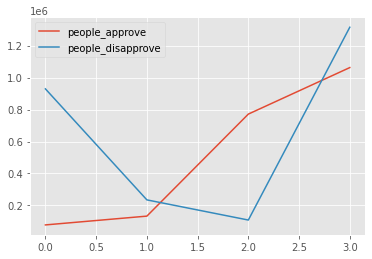

In [61]:
# Ejercicio 3
#!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
plt.style.use("ggplot")
%matplotlib notebook
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#import pickle

# Sobre los datos extraídos en el ejercicio 2 de la tabla approval_polls, calculad y representad gráficamente:

# 3.1 El número de personas que aprueban (approve) y el número de personas que desaprueban 
# (disapprove), para las preguntas que contienen las palabras Trump y coronavirus en 
# el texto. Representaremos estos datos por cada partido (party) (D (demócratas), 
# R (republicanos), I (independientes), all (personas sin clasificar por partido)).

# sum_column = df["col1"] + df["col2"]
# df["col3"] = sum_column
# print(df)

# Creo una columna con el cálculo de personas que aprueban
df_1_approvals['people_approve'] = (df_1_approvals['sample_size'] * df_1_approvals['approve']) /100
df_1_approvals['sample_size'] =(df_1_approvals['sample_size'].fillna(0)) # Relleno los na
df_1_approvals['people_approve'] =(df_1_approvals['people_approve'].fillna(0).astype(np.int64)) # Relleno los na
#df_1_approvals['people_approve'] = df_1_approvals['people_approve'].astype(np.int64) # Convierto a integer


# Creo una columna con el cálculo de personas que desaprueban
df_1_approvals['people_disapprove'] = (df_1_approvals['sample_size'] *df_1_approvals['disapprove']) /100
df_1_approvals['people_disapprove'] =(df_1_approvals['people_disapprove'].fillna(0).astype(np.int64) ) # Relleno los na
#df_1_approvals['people_disapprove'] = df_1_approvals['people_disapprove']# Convierto a integer

Total = df_1_approvals['people_approve'].sum()
print(f"The number of people that approves are: {Total}")


# Creo otra columna que me confirme si la pregunta contiene lo que buscamos
searchfor = ['Trump', 'Coronavirus']
df_1_approvals["TrueFalse"] = df_1_approvals['text'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)


# Número de personas que desaprueba por partido
# df_group = df_1_approvals.groupby('party')['people_approve'].sum()
# print(df_group.head())
print(df_1_approvals.groupby('party', as_index=False).agg({"people_approve": "sum","people_disapprove": "sum"}))
df_1_approvals.groupby('party', as_index=False).agg({"people_approve": "sum","people_disapprove": "sum"}).plot()
# # Número de personas que desaprueba por partido
# df_group = df_1_approvals.groupby('party')['people_disapprove'].sum()
# print(df_group.head())

# df_1_approvals.head()
# type(df_1_approvals)
# df_1_approvals['people_approve'].dtype

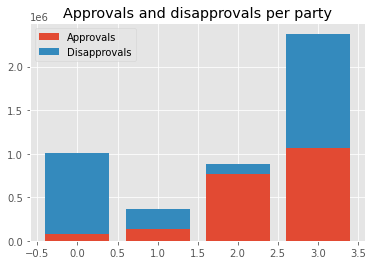

In [35]:
# labels = ['D', 'I', 'R', 'ALL']
# width = 0.35
fig, ax = plt.subplots()
aggregates = df_1_approvals.groupby('party', as_index=False).agg({"people_approve": "sum","people_disapprove": "sum"})
# First plot the Approvals bars for every party
ax.bar(aggregates.index, aggregates['people_approve'], label='Approvals')
# Then plot the Disapprovals bars on top, starting at the top of the approvals
# bars.
ax.bar(aggregates.index, aggregates['people_disapprove'], bottom=aggregates['people_approve'],
       label='Disapprovals')
ax.set_title('Approvals and disapprovals per party')
ax.legend()
plt.show()

# Uso de Git

Por tal de poner en práctica lo que habéis aprendido en la Unidad 6 sobre `Git`, proponemos el uso de `GitHub Classroom` para desarrollar vuestro paquete Python. GitHub Classroom es una herramienta gratuita de código abierto que ayuda a simplificar el uso educativo de GitHub. Hemos usado GitHub Classroom para crear una aula como esta y donde hemos creado una tarea para la PEC4. Para poder usar este espacio que hemos creado, os aconsejamos seguir los pasos indicados en aquesta [guía](https://drive.google.com/file/d/1i0PPxyLjnsuj9coWhHxZbnvq6yjlcXEC/view?usp=sharing) que explican cómo crear un repositorio para trabajar la tarea que hemos preparado, y que encontraréis en [este enlace](https://classroom.github.com/a/KejmGya1).

El uso de esta herramienta no es obligatorio para la evaluación de la PEC4, pero creemos que es una muy buena oportunidad para poner en práctica vuestros conocimientos en un entorno vital para todo aquel que trabaje o quiera trabajar en el ámbido de la ciencia de los datos.

## Criterios de corrección

Esta PEC se valorará siguiendo los criterios siguientes:

* **Funcionalidad** (5.75 puntos): Se valorará que el código implemente correctamente lo que pide el enunciado.
    * Ejercicio 1 (0.75 puntos)
    * Ejercicio 2 (0.3 puntos)
    * Ejercicio 3 (0.7 puntos)
    * Ejercicio 4 (1.5 puntos)
    * Ejercicio 5 (1.75 puntos)
    * Visualitzaciones (0.75 puntos)
* **Documentación** (0.5 puntos):  Todas las funciones de los ejercicios de esta PEC tendrán que estar correctamente documentadas utilizando docstrings (en el formato que prefiráis).  
* **Modularidad** (1 punto): Se valorará la modularidad del código (tanto la organización del código en ficheros como la creación de funciones). 
* **Estilo** (0.5 puntos): El código tiene que seguir la guía de estilo de Python (PEP8), exceptuando los casos donde hacerlo complique la legibilidad del código.
* **Tests** (1.25 puntos): El código tiene que contener una o varias *suites* de tests que permitan comprobar el buen funcionamiento de las funciones implementadas, obteniendo un mínimo del 50% de cobertura.
* **Requerimientos** (0.5 puntos): Es necesario crear un fichero de requerimientos que liste (sólo) las librerías necesarias para ejecutar el código.
* **README** y **licencia** (0.5 puntos): Se valorará la creación de un fichero README, que presente el proyecto y explique cómo ejecutarlo, así como la inclusión de la licencia bajo la cual se distribuye el código (podéis elegir la que queráis).


### Importante

**Nota 1**: Del mismo modo que en las PECs anteriores, los criterios transversales se valorarán de manera proporcional a la parte de la funcionalidad implementada. 

Por ejemplo, si el código sólo implementa la mitad de la funcionalidad requerida, y la documentación de esta parte es perfecta, entonces la puntuación correspondiente a la parte de documentación sería de 0.25.

**Nota 2**: Es imprescindible que el paquete que entreguéis se ejecute correctamente en la máquina virtual, y que el fichero de README que incluyáis explique claramente cómo se tiene que ejecutar vuestro código para generar las gráficas resultantes del análisis. Además de cómo ejecutar los test y comprobar la cobertura.

**Nota 3**: Entregad el paquete como un único archivo .zip en el Registro de Evaluación Continua. **El código de Python tendrá que estar escrito en ficheros planos de Python.**